In [48]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import API key
#from config import key

# import seaborn as sns
### importing modules for gmplots - plot og google map
import gmaps
import gmplot
### importing modules for plot on screen
from IPython.display import IFrame
from IPython.core.display import display
import os
import time
import seaborn as sns

In [50]:
#### Function definition to read the dataset

def read_crime_data():
    
    file = os.path.join('Resources','Crimes_2001_to_present.csv')
    crime_df = pd.read_csv(file)
    return crime_df

In [62]:
df=read_crime_data()

In [63]:
for col in df.columns: 
    print(col) 

ID
Case Number
Date
Block
IUCR
Primary Type
Description
Location Description
Arrest
Domestic
Beat
District
Ward
Community Area
FBI Code
X Coordinate
Y Coordinate
Year
Updated On
Latitude
Longitude
Location
Historical Wards 2003-2015
Zip Codes
Community Areas
Census Tracts
Wards
Boundaries - ZIP Codes
Police Districts
Police Beats


In [64]:

### remove some of the columns
df.drop(['Case Number','Block','IUCR', 'Community Area', 'Historical Wards 2003-2015','Census Tracts','Location'], axis=1, inplace=True)



In [70]:
df = df.dropna()

In [71]:
export_csv = df.to_csv (r'removed_columns_dropna.csv', index = None, header=True)

In [69]:
def read_crime_filtered_data():
    
    file = os.path.join('Resources','removed_columns_dropna.csv')
    crime_df_filtered = pd.read_csv(file)
    return crime_df_filtered

In [72]:
## Checking for null values

df.isnull().values.any()

False

In [73]:
### Drawing a correlation matrix to see if some features are the same
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

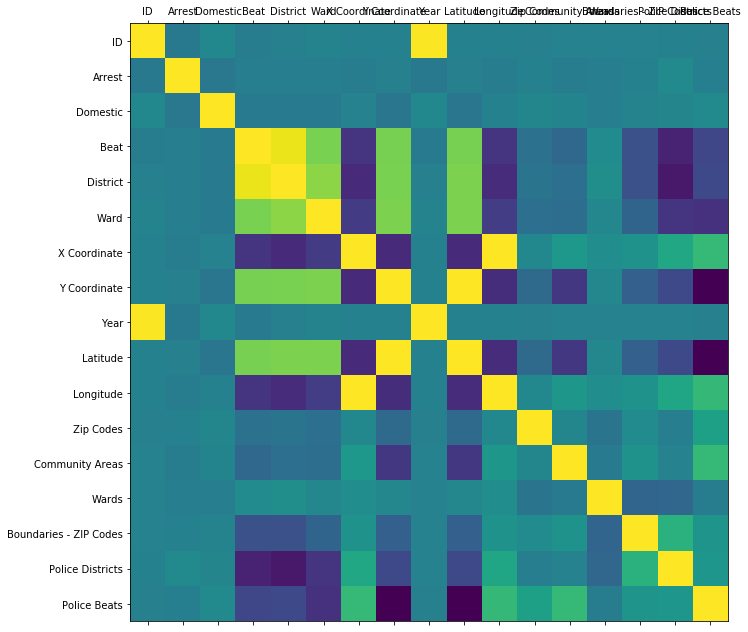

In [74]:
plot_corr(df)

In [ ]:
df.drop(['X Coordinate', 'Y Coordinate'], axis=1, inplace=True)


In [7]:
 ######################################################################
    ### Dropping non criminal incidents - think i will not drop these for now
#####################################################################
df = df[df['Primary Type'] != 'NON - CRIMINAL' ]
df = df[df['Primary Type'] != 'NON-CRIMINAL' ] 
df = df[df['Primary Type'] != 'NON-CRIMINAL (SUBJECT SPECIFIED)' ]

In [9]:
### Drop all duplicates and pick 6 crime types##########
### Burglary, theft, homicide, Narcotics, Battery, Robbery

df = df.dropna()


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11859143,JC470681,10/12/2019 11:58:00 PM,069XX S ADA ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,...,-87.657826,"(41.76779521, -87.657826025)",17.0,22257.0,65.0,21.0,32.0,23.0,17.0,216.0
1,11859039,JC470679,10/12/2019 11:57:00 PM,039XX W MADISON ST,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,PARKING LOT/GARAGE(NON.RESID.),True,False,...,-87.723882,"(41.880748488, -87.723881711)",11.0,21572.0,27.0,736.0,23.0,30.0,16.0,82.0
2,11859098,JC470671,10/12/2019 11:55:00 PM,018XX S ST LOUIS AVE,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,STREET,False,False,...,-87.712695,"(41.856209835, -87.712695108)",36.0,21569.0,30.0,800.0,14.0,57.0,21.0,153.0
3,11859480,JC471106,10/12/2019 11:49:00 PM,021XX W HOMER ST,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,-87.680928,"(41.916925787, -87.680927881)",16.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
4,11859057,JC470658,10/12/2019 11:47:00 PM,094XX S STONY ISLAND AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,GAS STATION,True,False,...,-87.585141,"(41.722546838, -87.585140707)",9.0,21202.0,48.0,252.0,35.0,25.0,19.0,246.0
6,11859053,JC470654,10/12/2019 11:45:00 PM,047XX S WESTERN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,-87.684414,"(41.808028819, -87.684414463)",29.0,14924.0,55.0,85.0,3.0,56.0,23.0,115.0
7,11859015,JC470651,10/12/2019 11:44:00 PM,007XX N HAMLIN AVE,1822,NARCOTICS,MANU/DEL:CANNABIS OVER 10 GMS,STREET,True,False,...,-87.721159,"(41.894430531, -87.721158575)",41.0,21572.0,24.0,584.0,46.0,30.0,16.0,66.0
8,11859067,JC470699,10/12/2019 11:43:00 PM,025XX W 53RD ST,1360,CRIMINAL TRESPASS,TO VEHICLE,STREET,True,False,...,-87.688123,"(41.797437564, -87.688122677)",49.0,22248.0,61.0,778.0,8.0,56.0,23.0,120.0
9,11859028,JC470641,10/12/2019 11:43:00 PM,063XX S CARPENTER ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,False,False,...,-87.650837,"(41.778761269, -87.650836637)",19.0,21559.0,66.0,436.0,2.0,11.0,17.0,203.0
10,11859046,JC470666,10/12/2019 11:40:00 PM,004XX N PARK DR,0460,BATTERY,SIMPLE,OTHER,True,False,...,-87.619611,"(41.890389293, -87.619610833)",22.0,21182.0,38.0,159.0,36.0,6.0,14.0,74.0


In [38]:
### Filter dataframe for the crimtypes you need and write it ##############

#crimetypes=['BURGLARY','ROBBERY', 'THEFT','NARCOTICS','HOMICIDE', 'BATTERY']

crime_df=df.rename(columns={"Primary Type": "CrimeType"})
crime_df_filtered= crime_df[(crime_df['CrimeType']  == 'NARCOTICS') | (crime_df['CrimeType'] == 'HOMICIDE') 
                            | (crime_df['CrimeType'] == 'BATTERY') | (crime_df['CrimeType'] == 'THEFT')
                           | (crime_df['CrimeType'] == 'BURGLARY') | (crime_df['CrimeType'] == 'ROBBERY' )
                           |(crime_df['CrimeType'] == 'ASSAULT') | (crime_df['CrimeType'] == 'MOTOR VEHICLE THEFT')]

#crime_df_filtered.head(5)
crime_df_filtered.CrimeType.unique()

export_csv = crime_df_filtered.to_csv (r'chicago_7_crimes_dataframe.csv', index = None, header=True)


In [33]:
crime_df_filtered.shape

(4131666, 30)

In [36]:
import seaborn
def get_sns(df,years, crime_types=[]):
    
    cols = list(df.columns.values)
    df1 = pd.DataFrame(columns=cols)   # empty data frame
    plt.figure(figsize = (15, 10))
    for crimetype in crime_types:
        df2=df.loc[(df['CrimeType']== crimetype) &  (df['Year' ] >= years[0]) & (df['Year' ] <= years[1]), : ]
        df1 = df1.append(df2, ignore_index = True)
    df1 = df1.dropna()
                   
    sns.countplot(y= 'Location Description', data = df1, order = \
              df1['Location Description'].value_counts().iloc[:18].index) 
    df.head()

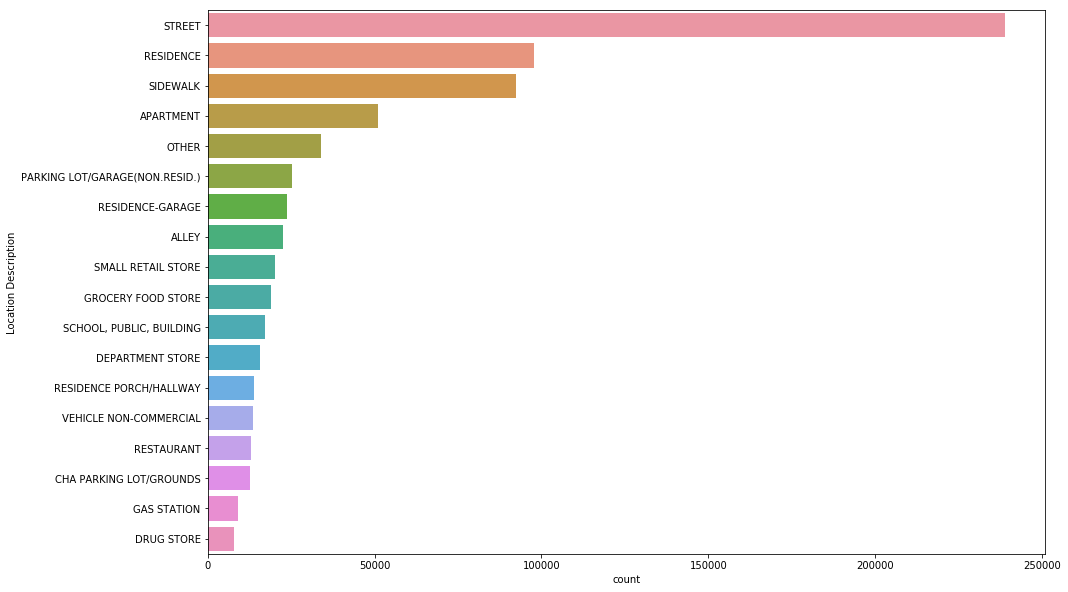

In [37]:
years=[2001, 2005]
get_sns(df = crime_df_filtered, years=years, \
                crime_types = ['ASSAULT', 'BURGLARY', 'NARCOTICS', 'HOMICIDE', 'THEFT', 'ROBBERY', 'MOTOR VEHICLE THEFT'])

In [47]:
def read_crime_filtered_data():
    
    file = os.path.join('Resources','chicago_7_crimes_dataframe.csv')
    crime_df_filtered = pd.read_csv(file)
    return crime_df_filtered

In [46]:
crime_df_filtered=read_crime_filtered_data()
crime_df_filtered.head(4)


,ID,Case Number,Date,Block,IUCR,CrimeType,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11859039,JC470679,10/12/2019 11:57:00 PM,039XX W MADISON ST,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,PARKING LOT/GARAGE(NON.RESID.),True,False,...,-87.723882,"(41.880748488, -87.723881711)",11.0,21572.0,27.0,736.0,23.0,30.0,16.0,82.0
1,11859098,JC470671,10/12/2019 11:55:00 PM,018XX S ST LOUIS AVE,0454,BATTERY,AGG PO HANDS NO/MIN INJURY,STREET,False,False,...,-87.712695,"(41.856209835, -87.712695108)",36.0,21569.0,30.0,800.0,14.0,57.0,21.0,153.0
2,11859480,JC471106,10/12/2019 11:49:00 PM,021XX W HOMER ST,0820,THEFT,$500 AND UNDER,RESIDENTIAL YARD (FRONT/BACK),False,False,...,-87.680928,"(41.916925787, -87.680927881)",16.0,22535.0,23.0,373.0,40.0,1.0,7.0,192.0
3,11859053,JC470654,10/12/2019 11:45:00 PM,047XX S WESTERN AVE,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,False,False,...,-87.684414,"(41.808028819, -87.684414463)",29.0,14924.0,55.0,85.0,3.0,56.0,23.0,115.0


In [34]:

crime_df_filtered = crime_df_filtered.dropna(axis = 0, how ='any') 

    

error: missing ), unterminated subpattern at position 0

In [42]:
import folium
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")

for i in range(10):
    lat = crime_df_filtered['Latitude'].iloc[i]
    long = crime_df_filtered['Longitude'].iloc[i]
    radius = 10

    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               crime_df_filtered['Location'].value_counts()
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = '#3db7e4', fill = True).add_to(chicago_map_crime)

chicago_map_crime.save('ChicagoMapPlotFoliums.html')    

In [39]:
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

m = folium.Map([41.8781, -87.6298], zoom_start=11)
for index, row in crime_df_filtered.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=15,
                        popup=row['CrimeType'],
                        fill_color="#3db7e4", #  color
                       ).add_to(m)

KeyboardInterrupt: 

In [43]:
stationArr = crime_df_filtered[['Latitude', 'Longitude']].as_matrix()

# plot heatmap
chicago_map_crime.add_children(plugins.HeatMap(stationArr, radius=15))

#m.save('ChicagoMapPlotFoliums.html')

C:\Users\divya\Anaconda3\envs\pythonData\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


NameError: name 'plugins' is not defined